# Capital One - NYC Green Taxi Data

In this notebook we will explore data from the NYC Taxi & Limosuine Commission website, specifically the data covering 'green' taxis on September 2015. Green taxis are those defined as 'taxis that are not allowed to pick up passengers inside of the densely populated areas of Manhattan'. We will address the questions specified for this interview, as well as explore the data for any additional insights we can find that will help us understand the data and build a better predictive model. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

## Exploratory Data Analysis

After importing the libraries we will initially need, we will go ahead and read in the data. This is a very large data set will almost 1.5 million entries and 21 features. Comprehensive information about each feature can be found on the NYC taxi commission website (found here http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf). Initially glancing over the data, we see that there are two main subcategories of features: those dealing with location/time and those dealing with cost.  Although almost all the values are numeric, some represent categorical features that have been encoded into integers (as seen on the information guide on the website), this will be important to keep in mind.

In [4]:
#Question 1
data = pd.read_csv('green_tripdata_2015-09.csv')

print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])

data.describe()

Number of rows: 1494926
Number of columns: 21


,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,0.0,1.494926e+06,1.494926e+06,1.494926e+06,1.494922e+06
mean,1.782045e+00,1.097653e+00,-7.383084e+01,4.069114e+01,-7.383728e+01,4.069291e+01,1.370598e+00,2.968141e+00,1.254320e+01,3.512800e-01,4.866408e-01,1.235727e+00,1.231047e-01,NaN,2.920991e-01,1.503215e+01,1.540559e+00,1.022353e+00
std,4.128570e-01,6.359437e-01,2.776082e+00,1.530882e+00,2.677911e+00,1.476698e+00,1.039426e+00,3.076621e+00,1.008278e+01,3.663096e-01,8.504473e-02,2.431476e+00,8.910137e-01,NaN,5.074009e-02,1.155316e+01,5.232935e-01,1.478288e-01
min,1.000000e+00,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,NaN,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.317726e+01,0.000000e+00,4.279934e+01,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,NaN,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00


We will go ahead and analyze the trip distances in our data. A histogram is a fantastic visualization for continuous data, however we see one inherent problem from the initial plotting of our data. Due to the binning structure of a histogram, much of the information is lost when outliers are present. Because the histogram will attempt to show all the data, those outliers which are far away from the majority of the data will have equal representation on the X-axis. This will cause a major distortion in the histogram in which the majority of the data will be bucketed into one bin, as we see in the figure below.

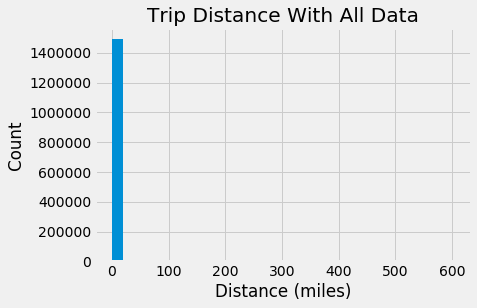

In [6]:
#Question 2
data['Trip_distance'].hist(bins = 30)
plt.title('Trip Distance With All Data')
plt.xlabel('Distance (miles)')
plt.ylabel('Count')
plt.show()

We can deal with this problem by sub-setting our data with those points not classified as outliers. An outlier can be defined in many ways, most often being defined as those points which are a certain number of standard deviations from the mean. However, knowing that there are outliers that are vastly different from the majority of the population, I opted to define an outlier using the median as the measure of centrality and the median absolute deviation (MAD for short) as the measure of dispersion. Both the mean and standard deviation are susceptible to outliers which skew their value so the median and MAD are better representations of this data. In order to be conservative with how much data I threw out, I defined an outlier as being 5 times the MAD greater/less than the median of this population. After doing so, the resulting histogram shows a very right skewed distribution which confirms that the median and MAD will be a better representation of our data.

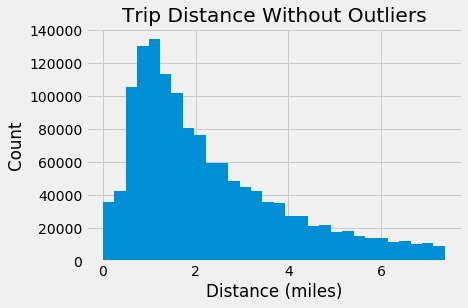

In [44]:
def MAD(x):
    mad = np.median(np.abs(x - np.median(x)))
    return mad

dist_no_out = data.Trip_distance[ (data.Trip_distance - np.median(data.Trip_distance)) < 5*MAD(data.Trip_distance)]

dist_no_out.hist(bins = 30)
plt.title('Trip Distance Without Outliers')
plt.xlabel('Distance (miles)')
plt.ylabel('Count')
plt.show()

Most often times in the real world a right skewed distribution can fitted by a lognormal distribution. In order to check if this assumption is correct, we will use the SciPy library to find the maximum likelihood estimates (MLE's) of a lognormal distribution of our data. We assume that the location paramater is 0 and the scale paramter is equal to the median so we are most interested in finding the shape parameter of our distribution. After find the MLE of the shape parameter, we can overlay the distribution with a frequency histogram and visually inspect how good of a fit we have. From looking as the overlay, we see that the data seems to fit very well to this distribution. 

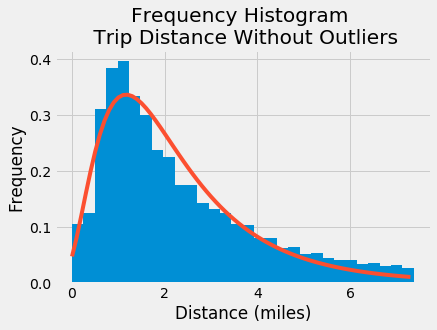

In [8]:
import scipy.stats as sp

shape, loc, scale = sp.lognorm.fit(dist_no_out, loc = 0, scale = np.median(dist_no_out))
dist_pdf = sp.lognorm.pdf(np.arange(min(dist_no_out),max(dist_no_out),.1), shape, loc, scale)

dist_no_out.hist(bins = 30, normed = True)
plt.plot(np.arange(min(dist_no_out), max(dist_no_out),.1), dist_pdf)
plt.title('Frequency Histogram \n Trip Distance Without Outliers')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()

Assuming our data is log-normally distribution, another check we can do is see if a log transform of our data fits a normal distribution. From visual inspection, the data does seem normal, however the tails on the right side seem a bit heavier than that of a standard normal distribution. This transform may be important due to some statistical tests which require a parametric assumption of normality of our data. To go even further, we could do a boxcox transform to find the power transform which would make our data most normal (as we can see on the second plot below). The resulting histogram from the boxcox transform is very similar to the log transform, so the log transform will do if we need to change the data in the future. 

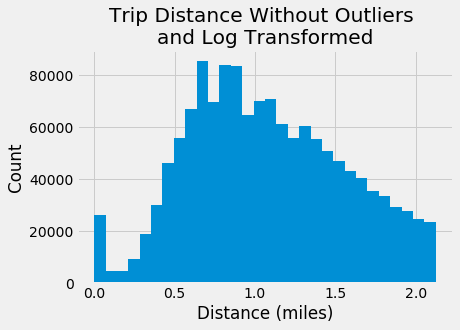

In [10]:
np.log1p(dist_no_out).hist(bins = 30)
plt.title('Trip Distance Without Outliers \nand Log Transformed')
plt.xlabel('Distance (miles)')
plt.ylabel('Count')
plt.show()

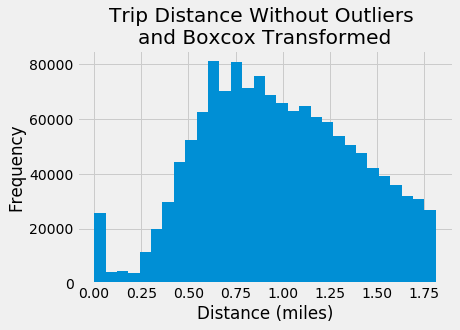

In [17]:
box_dist,_ = sp.boxcox(dist_no_out+1)

plt.hist(box_dist, bins = 30)
plt.title('Trip Distance Without Outliers \nand Boxcox Transformed')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()

We would like to inspect how the mean and medium trip distance varies hour over hour for both pickup and drop-off hours. Since the data was read as a character, we find need to specify that the format is a date-time, then extract the hour from this. We can then easily create a pivot table for both the pickup and drop-off hours. We see that the greatest distances tend to be early in the morning  around 5am to 6am. A quick hypothesis about this would be that these are people who live farther away from their work places trying to beat the morning rush hour.

In [ ]:
#Question 3
from datetime import datetime

    
data['pickup_time'] = data.lpep_pickup_datetime.apply( lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
data['dropoff_time'] = data.Lpep_dropoff_datetime.apply( lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

data['pickup_hour'] = data.pickup_time.apply(lambda x: x.hour)
data['dropoff_hour'] = data.dropoff_time.apply(lambda x: x.hour)

In [19]:
data.pivot_table(index='pickup_hour', values='Trip_distance', aggfunc=('mean','median'))

,mean,median
pickup_hour,,
0,3.115276,2.20
1,3.017347,2.12
2,3.046176,2.14
3,3.212945,2.20
4,3.526555,2.36
5,4.133474,2.90
6,4.055149,2.84
7,3.284394,2.17
8,3.048450,1.98


In [18]:
data.pivot_table(index='dropoff_hour', values='Trip_distance', aggfunc=('mean','median'))

,mean,median
dropoff_hour,,
0,3.239356,2.28
1,3.130531,2.20
2,3.143715,2.21
3,3.225473,2.26
4,3.463798,2.37
5,4.187841,2.92
6,3.932660,2.76
7,3.217171,2.05
8,2.923779,1.87


We are interested in analyzing those trips which originate/terminate near an airport. To do this we will identify which airports are up for consideration, which in this case are JFK, LaGuardia, and Newark airports. We could look at the RateID to get an idea of which trips to consider, but instead I will opt to find the distances using the pickup and drop-off GPS coordinates. We will use the haversine formula which is used in geography to measure distances between points on Earth. This measure is more robust than a straight line distance as it account for the curvature of the Earth in its calculations. After trying to implement an efficient version of this formula, I opted to find one online and found a very good one (see below for credit).

In [21]:
### https://nathanrooy.github.io/posts/2016-09-07/haversine-with-python/
import math

class Haversine:
    '''
    use the haversine class to calculate the distance between
    two lon/lat coordnate pairs.
    output distance available in kilometers, meters, miles, and feet.
    example usage: Haversine([lon1,lat1],[lon2,lat2]).feet
    
    '''
    def __init__(self,coord1,coord2):
        lon1,lat1=coord1
        lon2,lat2=coord2
        
        R=6371000                               # radius of Earth in meters
        phi_1=math.radians(lat1)
        phi_2=math.radians(lat2)

        delta_phi=math.radians(lat2-lat1)
        delta_lambda=math.radians(lon2-lon1)

        a=math.sin(delta_phi/2.0)**2+\
           math.cos(phi_1)*math.cos(phi_2)*\
           math.sin(delta_lambda/2.0)**2
        c=2*math.atan2(math.sqrt(a),math.sqrt(1-a))
        
        self.meters=R*c                         # output distance in meters
        self.km=self.meters/1000.0              # output distance in kilometers
        self.miles=self.meters*0.000621371      # output distance in miles
        self.feet=self.miles*5280               # output distance in feet

if __name__ == "__Haversine__":
    main()

After crating this class I used Google maps to find the coordinates of the three corresponding airports. The distance using the haversine formula was then computed for each trip for both it's pickup and drop-off location. Once these distances have been calculated, we can subset our data by classifying those trips which originated/terminated at an airport as being within 1.5 miles from an airport. We can then compute some interesting characteristics of these trips such as the number of each, average fare, and average tip

It seems that there are more drop-offs to the airports and the corresponding fares and tips are higher. The tips being higher could be a result of the total fares being higher, however the percentage tip is still higher for drop-offs. An off-the-hand hypothesis is that given how busy these airports are, passenger may be more often running late and thus being more grateful to taxi drivers if they make it on time, leading to a higher tip percentage.


In [45]:
jfk_long = -73.7781
jfk_lat = 40.6413

ewr_long = -74.1745
ewr_lat = 40.6895

lga_long = -73.8740
lga_lat = 40.7769


dist_to_jfk = data.apply(lambda x: Haversine([jfk_long, jfk_lat], [x.Pickup_longitude, x.Pickup_latitude]).miles, axis = 1)
dist_to_ewr = data.apply(lambda x: Haversine([ewr_long, ewr_lat], [x.Pickup_longitude, x.Pickup_latitude]).miles, axis = 1)
dist_to_lga = data.apply(lambda x: Haversine([lga_long, lga_lat], [x.Pickup_longitude, x.Pickup_latitude]).miles, axis = 1)

pickup_by_airport = data[(dist_to_jfk < 1.5) | (dist_to_ewr < 1.5) | (dist_to_lga < 1.5)]

dist_to_jfk = data.apply(lambda x: Haversine([jfk_long, jfk_lat], [x.Dropoff_longitude, x.Dropoff_latitude]).miles, axis = 1)
dist_to_ewr = data.apply(lambda x: Haversine([ewr_long, ewr_lat], [x.Dropoff_longitude, x.Dropoff_latitude]).miles, axis = 1)
dist_to_lga = data.apply(lambda x: Haversine([lga_long, lga_lat], [x.Dropoff_longitude, x.Dropoff_latitude]).miles, axis = 1)

dropoff_by_airport = data[(dist_to_jfk < 1.5) | (dist_to_ewr < 1.5) | (dist_to_lga < 1.5)]


print('Number of Taxi pickups at airport:' , pickup_by_airport.shape[0])
print('Number of Taxi dropoffs at airport:', dropoff_by_airport.shape[0])

print('Average fare of pickups at airport:' , pickup_by_airport.Fare_amount.mean())
print('Average fare of dropoffs at airport:', dropoff_by_airport.Fare_amount.mean())

print('Average tip of pickups at airport:' , pickup_by_airport.Tip_amount.mean())
print('Average tip of dropoffs at airport:', dropoff_by_airport.Tip_amount.mean())

Number of Taxi pickups at airport: 8339
Number of Taxi dropoffs at airport: 60532
Average fare of pickups at airport: 13.35023504017266
Average fare of dropoffs at airport: 21.575358157668656
Average tip of pickups at airport: 1.056458808010552
Average tip of dropoffs at airport: 2.6081208286526527


We can create some histograms to do some analysis on the difference between trips that picked up passengers by airports, and those that dropped them off. Intuitively, we see that most of the pickups occur in the morning and most of the drop-off occur at night. Since NYC is a major business hub, there are many people flying in and out of the city for their jobs/conferences/etc. We could do even further analysis by seeing which days have the most pickups/dropoffs, but due to time constraints we can leave that for later. 

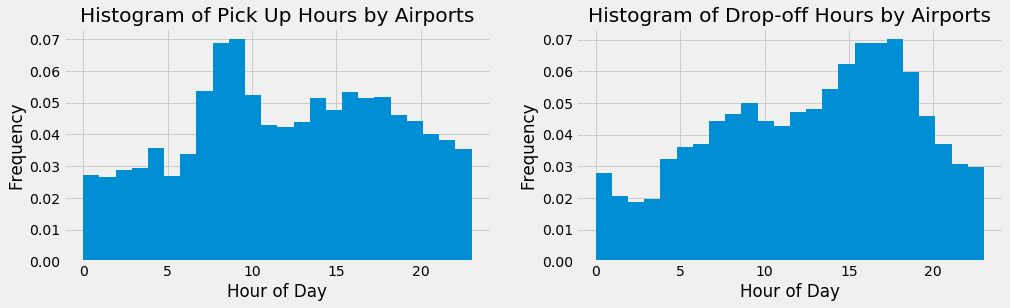

In [27]:
fig,ax = plt.subplots(1,2,figsize = (15,4))

pickup_by_airport.pickup_hour.hist(bins = 24, ax = ax[0], normed = True)
ax[0].set_xlabel('Hour of Day')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Pick Up Hours by Airports')

dropoff_by_airport.dropoff_hour.hist( bins = 24, ax = ax[1], normed = True)
ax[1].set_xlabel('Hour of Day')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Drop-off Hours by Airports')

plt.show()

## Predictive modeling

In this next section we will aim to building a model which will predict how much a passenger will tip the taxi driver given the features in our dataset. Before we do this, we will have to do some data cleanup, feature engineering, and model tuning. First, we will create the target variable, which the tip percentage. Summary statistics on this feature show that the average tip is around 6% and the largest tip being 100%


In [28]:
#Question 4

data['tip_percent'] = 100*data.Tip_amount/data.Total_amount
data['tip_percent'].describe()

count    1.490754e+06
mean     6.653826e+00
std      8.875158e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.666667e+01
max      1.000000e+02
Name: tip_percent, dtype: float64

We will clean up our dataset now by doing the following process:

1. Read in our data again to ensure original values are used
2. Drop the 'Ehail_fee' feature as almost 99% of the data is missing
3. Replace missing values in the 'Trip_type' feature with that features mode
4. Replace RateCodeId's greater than 6 with that features mode since no value was specified on the feature dictionary
5. Change negative numeric values to their absolute value (it is important to specify that I am assuming this is a clerical error and that there was actually no money given the passenger as a negative would indicate)
6. Create new features specifying how far each drop-off/pickup is from the three corresponding airports
7. Create new feature describing if a pickup/drop-off is close to an airport and which one
8. Map categorical feature 'Store_and_fwd_flag' to numeric
8. Drop unneeded columns

For the new features, a quick clarification is that both the distance from the airport will be used and also another feature which categorizes which airport it is close to (if any)


In [31]:
model_data = pd.read_csv('green_tripdata_2015-09.csv')

clean_data = model_data.copy()
#Drop Ehail as most data is missing
clean_data = clean_data.drop(['Ehail_fee'], axis = 1)
    
#Fix Column name and replace missing values with mode
clean_data.rename(columns={'Trip_type ':'Trip_type'}, inplace = True)
clean_data.Trip_type.mode() 
clean_data.Trip_type.fillna(1, inplace = True)
    
#Raplce Rate Code ID values greater than 6 with the mode
clean_data.loc[clean_data.RateCodeID > 6,'RateCodeID'] = 1

    
#Replace negative values for payment amounts to their absolute value
clean_data.Fare_amount = clean_data.Fare_amount.abs()
clean_data.Extra = clean_data.Extra.abs()
clean_data.MTA_tax = clean_data.MTA_tax.abs()
clean_data.Total_amount = clean_data.Total_amount.abs()
clean_data.Tip_amount = clean_data.Tip_amount.abs()
clean_data.Tolls_amount = clean_data.Tolls_amount.abs()
clean_data.improvement_surcharge = clean_data.improvement_surcharge.abs()
clean_data.Total_amount = clean_data.Total_amount.abs()
    
    
#Change Times to datetime format
clean_data['pickup_time'] = clean_data.lpep_pickup_datetime.apply( lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
clean_data['dropoff_time'] = clean_data.Lpep_dropoff_datetime.apply( lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

clean_data['pickup_hour'] = clean_data.pickup_time.apply(lambda x: x.hour)
clean_data['dropoff_hour'] = clean_data.dropoff_time.apply(lambda x: x.hour)

#Create variable describing if picked up near airport
clean_data['pickup_dist_to_jfk'] = clean_data.apply(lambda x: Haversine([jfk_long, jfk_lat], [x.Pickup_longitude, x.Pickup_latitude]).miles, axis = 1)
clean_data['pickup_dist_to_ewr'] = clean_data.apply(lambda x: Haversine([ewr_long, ewr_lat], [x.Pickup_longitude, x.Pickup_latitude]).miles, axis = 1)
clean_data['pickup_dist_to_lga'] = clean_data.apply(lambda x: Haversine([lga_long, lga_lat], [x.Pickup_longitude, x.Pickup_latitude]).miles, axis = 1)

clean_data['pickup_near_airport'] = 0
clean_data.loc[clean_data['pickup_dist_to_jfk'] < 1.5, 'pickup_near_airport'] = 1
clean_data.loc[clean_data['pickup_dist_to_ewr'] < 1.5, 'pickup_near_airport'] = 2
clean_data.loc[clean_data['pickup_dist_to_lga'] < 1.5, 'pickup_near_airport'] = 3
    
clean_data['dropoff_dist_to_jfk'] = data.apply(lambda x: Haversine([jfk_long, jfk_lat], [x.Dropoff_longitude, x.Dropoff_latitude]).miles, axis = 1)
clean_data['dropoff_dist_to_ewr'] = data.apply(lambda x: Haversine([ewr_long, ewr_lat], [x.Dropoff_longitude, x.Dropoff_latitude]).miles, axis = 1)
clean_data['dropoff_dist_to_lga'] = data.apply(lambda x: Haversine([lga_long, lga_lat], [x.Dropoff_longitude, x.Dropoff_latitude]).miles, axis = 1)

clean_data['dropoff_near_airport'] = 0
clean_data.loc[clean_data['dropoff_dist_to_jfk'] < 1.5, 'dropoff_near_airport'] = 1
clean_data.loc[clean_data['dropoff_dist_to_ewr'] < 1.5, 'dropoff_near_airport'] = 2
clean_data.loc[clean_data['dropoff_dist_to_lga'] < 1.5, 'dropoff_near_airport'] = 3

#Map Categorical to numeric
clean_data.Store_and_fwd_flag = clean_data.Store_and_fwd_flag.map({'N':0, 'Y':1})

#Drop unneeeded columns
clean_data = clean_data.drop(['lpep_pickup_datetime', 'Lpep_dropoff_datetime',
                 'Pickup_longitude', 'Pickup_latitude', 
                 'Dropoff_longitude', 'Dropoff_latitude',
                 'pickup_time', 'dropoff_time'], axis = 1)
    

We will do a sanity check to ensure no data is missing and the columns we need are present as this may cause problems for the machine learning algorithms intended to be used later. Thankfully, it looks like everything is in line.

In [33]:
clean_data.isnull().sum()

VendorID                 0
Store_and_fwd_flag       0
RateCodeID               0
Passenger_count          0
Trip_distance            0
Fare_amount              0
Extra                    0
MTA_tax                  0
Tip_amount               0
Tolls_amount             0
improvement_surcharge    0
Total_amount             0
Payment_type             0
Trip_type                0
pickup_hour              0
dropoff_hour             0
pickup_dist_to_jfk       0
pickup_dist_to_ewr       0
pickup_dist_to_lga       0
pickup_near_airport      0
dropoff_dist_to_jfk      0
dropoff_dist_to_ewr      0
dropoff_dist_to_lga      0
dropoff_near_airport     0
dtype: int64

In [32]:
clean_data.describe()

,VendorID,Store_and_fwd_flag,RateCodeID,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,...,pickup_hour,dropoff_hour,pickup_dist_to_jfk,pickup_dist_to_ewr,pickup_dist_to_lga,pickup_near_airport,dropoff_dist_to_jfk,dropoff_dist_to_ewr,dropoff_dist_to_lga,dropoff_near_airport
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,...,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06
mean,1.782045e+00,5.842430e-03,1.097260e+00,1.370598e+00,2.968141e+00,1.257645e+01,3.523639e-01,4.881038e-01,1.235904e+00,1.231683e-01,...,1.353407e+01,1.347794e+01,1.923594e+01,2.128205e+01,1.297712e+01,1.627438e-02,1.861605e+01,2.077453e+01,1.265310e+01,1.035061e-01
std,4.128570e-01,7.621220e-02,6.049419e-01,1.039426e+00,3.076621e+00,1.004128e+01,3.652671e-01,7.620108e-02,2.431386e+00,8.910049e-01,...,6.799624e+00,6.892356e+00,2.012907e+02,2.020039e+02,2.017730e+02,2.192457e-01,1.941715e+02,1.948555e+02,1.946229e+02,5.304224e-01
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,2.655135e-01,1.750998e-01,1.631980e-01,0.000000e+00,2.292553e-01,1.717118e-01,1.443062e-01,0.000000e+00
25%,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,...,9.000000e+00,9.000000e+00,9.896457e+00,1.153752e+01,3.793916e+00,0.000000e+00,9.713395e+00,1.143888e+01,3.925887e+00,0.000000e+00
50%,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,...,1.500000e+01,1.500000e+01,1.125959e+01,1.395626e+01,4.995912e+00,0.000000e+00,1.151715e+01,1.357247e+01,5.323268e+00,0.000000e+00
75%,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,...,1.900000e+01,1.900000e+01,1.406028e+01,1.532471e+01,7.339217e+00,0.000000e+00,1.386996e+01,1.557646e+01,7.321338e+00,0.000000e+00
max,2.000000e+00,1.000000e+00,6.000000e+00,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,...,2.300000e+01,2.300000e+01,5.372815e+03,5.393848e+03,5.379492e+03,3.000000e+00,5.372815e+03,5.393848e+03,5.379492e+03,3.000000e+00


Since we are only trying to predict tip as a percentage of the total amount, we will need to discard those fares which have a total amount of zero. This zero amount could be due to discounts made by the taxi driver for a number of reasons, but for the sake of this model we will exclude these rows. 

In [34]:
clean_model = clean_data.copy()

clean_model = clean_data.loc[clean_data.Total_amount > 0,:]
clean_model.Total_amount.min()

0.01

For our predictive model we will use a simple stack of two algorithms: Random Forest and Extremely Randomized Trees. Both these regressors work in a similar fashion in that they partition our feature space using decision trees, however the underlying assumptions on the splits occurring in each tree differ from each other. 

However, before doing this we have to do a few things: take a sample of the data, normalize our data by mean centering and scaling, and create a train and test set. Since this dataset has 1.5 million rows, the processing power of my laptop would result in this model taking a few days to run. I will instead take a random sample of 100,000 rows and use that as my dataset. After normalizing the data, we will create a training set with 2/3 of our data and measure the performance of our model using the test set. 

We be using a 5-fold cross validated grid search to find the optimal parameters of both our regressors. After each algorithm has been optimized, we will use a linear combination of the two which minimizes the mean squared error.


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


clean_model_sample = clean_model.sample(100000, random_state = 2017)


X = clean_model_sample.copy()
y = 100*clean_model_sample.Tip_amount/clean_model_sample.Total_amount

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state = 2017)
  

In [37]:
#Random Forest

params = {'n_estimators': np.arange(10,100,10)}

reg1 = GridSearchCV(RandomForestRegressor(), params, cv = 5, verbose = 0)

reg1.fit(X_train, y_train)

reg1.best_params_
reg1.best_score_

reg1_pred = reg1.predict(X_test)

print(mean_squared_error(y_test, reg1_pred))
print(r2_score(y_test, reg1_pred))

0.110979389745
0.998598799394


In [38]:
#extremely randomized trees

params = {'n_estimators': np.arange(10,100,10)}

reg2 = GridSearchCV(ExtraTreesRegressor(), params, cv = 5, verbose = 0)

reg2.fit(X_train, y_train)

reg2.best_params_
reg2.best_score_

reg2_pred = reg2.predict(X_test)

print(mean_squared_error(y_test, reg2_pred))
print(r2_score(y_test, reg2_pred))

0.0439833667851
0.999444675986


Both regressors seem to fit that data very well, with each having a very low mean squared error. We can push the boundaries of this even further by finding a linear combination of the predictions which minimize the mean squared error. It should be noted that we are using the test set to find this last optimization which is not always possible in the real world. However, given the abundance of data in this dataset I went ahead with this method. We see that we are able to lower the mean squared error even further using this method. Although the result may not be materially significant, this shows the power of a simple stacking of two regressors.

Going forward there is definitely room to improve by tuning more hyperparamets in the Random Forest and Extremely randomized tree algorithms. There is also the possibility of adding in other regressors and creating more complicated stacks which can push the boundaries of how accurate our predictive model can be


In [43]:
best_i = float(0)
best_j = float(0)
best_score = float(1000)

for i in np.arange(0,1.01,.01):
    for j in np.arange(0,1.01,.01):
        score = mean_squared_error(y_test, i*reg2_pred + j*reg1_pred)
        if score < best_score:
            best_score = score
            best_i = i
            best_j = j
        
print('Best coefficient for ET Regressor:', best_i)
print('Best coefficient for RF Regressor:', best_j)  
print('Best mean squared error:' , mean_squared_error(y_test, best_i*reg2_pred + best_j*reg1_pred))     
print('Best R2 Score:', r2_score(y_test, best_i*reg2_pred + best_j*reg1_pred))

Best coefficient for ET Regressor: 0.9
Best coefficient for RF Regressor: 0.1
Best mean squared error: 0.0431354878084
Best R2 Score: 0.999455381114


## Analysis on Speeds

We will be doing some analysis and statistical tests on the weekly speeds of the taxis. We will want to see if the averages of weekly speeds various enough to statistically reject a hypothesis stating that they are similar. 

We will first do a one way ANOVA test which determines if there are any statistically significant differences between the means of two or more groups. We will then do a t-test between each week to see if there are any intra month similarities. First we will need to derive a speed feature which we can by extracting the time between dropoff and pickup, then dividing by the trip distance. We will also need to exclude those values which are unrealistic, whose occurrence is due most likely to incorrect data entry. Note that the weeks shown will be weeks according to the beginning of the year, not since the beginning of September


In [47]:
data['tot_time'] = data.apply(lambda x: (x['dropoff_time'] - x['pickup_time']).total_seconds(), axis = 1)

data['speed'] = 3600*data['Trip_distance']/ data['tot_time']

data['day'] = data.dropoff_time.apply(lambda x: x.day)

data['week'] = data.dropoff_time.apply(lambda x: x.week)

In [48]:
data = data.loc[(data.speed > 1) & (data.speed <30),:]

data.speed.describe()

count    1.433724e+06
mean     1.265069e+01
std      4.814452e+00
min      1.001494e+00
25%      9.417440e+00
50%      1.176349e+01
75%      1.486567e+01
max      3.000000e+01
Name: speed, dtype: float64

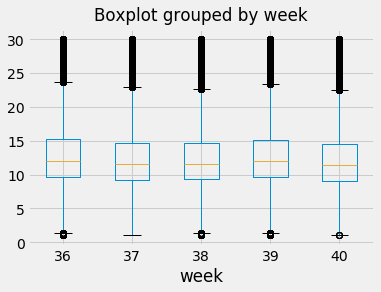

In [54]:
data.boxplot('speed', 'week')
plt.title('')
plt.show()

The ANOVA has a very small p-value, leading us to reject the null hypothesis that the means of these speeds are similar. However, we must note that we are violating some of the assumptions of ANOVA, most notably the independence of data points and no significant outliers. Assuming that we are not grossly violating these assumptions though, we can proceed with the t-tests.

In [55]:
from scipy.stats import f_oneway

f_oneway(data.loc[data.week == 36, 'speed'], data.loc[data.week == 37 , 'speed'],
         data.loc[data.week == 38, 'speed'], data.loc[data.week == 39, 'speed'],
         data.loc[data.week == 40, 'speed'])

F_onewayResult(statistic=1059.639828036645, pvalue=0.0)

The t-tests between each of the weeks show that we reject the null hypothesis that the means between each of the weeks are equal. all the p-values are either 0 or very close to 0, with the exception of the p-value between weeks 2 and 3. My hypothesis on why they differ would have to do with the weather, since September lies in fall and the weather significantly drops that may lead to some impact on inner city transportation

In [56]:
from scipy.stats import ttest_ind

p_values_36 = []
for i in np.arange(36,41,1): 
        p_values_36.append(ttest_ind(data.loc[data.week == 36, 'speed'],data.loc[data.week == i, 'speed'])[1])

p_values_37 = []
for i in np.arange(36,41,1): 
        p_values_37.append(ttest_ind(data.loc[data.week == 37, 'speed'],data.loc[data.week == i, 'speed'])[1])

p_values_38 = []
for i in np.arange(36,41,1): 
        p_values_38.append(ttest_ind(data.loc[data.week == 38, 'speed'],data.loc[data.week == i, 'speed'])[1])

p_values_39 = []
for i in np.arange(36,41,1): 
        p_values_39.append(ttest_ind(data.loc[data.week == 39, 'speed'],data.loc[data.week == i, 'speed'])[1])

p_values_40 = []
for i in np.arange(36,41,1): 
        p_values_40.append(ttest_ind(data.loc[data.week == 40, 'speed'],data.loc[data.week == i, 'speed'])[1])

print(p_values_36)
print(p_values_37)
print(p_values_38)
print(p_values_39)
print(p_values_40)

[1.0, 0.0, 0.0, 6.4102987172710384e-18, 0.0]
[0.0, 1.0, 0.00028531284667125103, 0.0, 4.3562604958409219e-22]
[0.0, 0.00028531284667125103, 1.0, 8.5518483863695845e-279, 5.8631845224532913e-36]
[6.4102987172710384e-18, 0.0, 8.5518483863695845e-279, 1.0, 0.0]
[0.0, 4.3562604958409219e-22, 5.8631845224532913e-36, 0.0, 1.0]


Looking at speeds by hour of the day, it immediately pops out that around 6 and 7 am have a much higher mean than the rest of the day. This is probably due to the morning commute of those people who work far from their workplaces and have to beat the morning rush hour. Since the roads are somewhat clearer before the rush, they are able to achieve a faster speed than they would have if they left during rush hour. The one way ANOVA also shows us that is reject the null hypothesis that the means between the hours are the same.

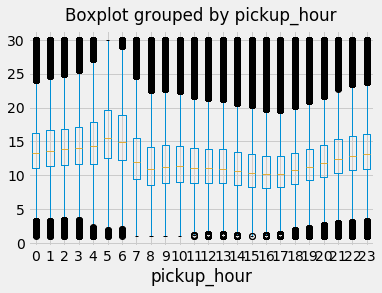

In [59]:
data.boxplot('speed', 'pickup_hour')
plt.title('')
plt.show()

In [62]:


f_oneway(data.loc[data.pickup_hour == 0, 'speed'], data.loc[data.pickup_hour == 1, 'speed'],
         data.loc[data.pickup_hour == 2, 'speed'],data.loc[data.pickup_hour == 3, 'speed'],
         data.loc[data.pickup_hour == 4, 'speed'],data.loc[data.pickup_hour == 5, 'speed'],
         data.loc[data.pickup_hour == 6, 'speed'],data.loc[data.pickup_hour == 7, 'speed'],
         data.loc[data.pickup_hour == 8, 'speed'],data.loc[data.pickup_hour == 9, 'speed'],
         data.loc[data.pickup_hour == 10, 'speed'],data.loc[data.pickup_hour == 11, 'speed'],
         data.loc[data.pickup_hour == 12, 'speed'],data.loc[data.pickup_hour == 13, 'speed'],
         data.loc[data.pickup_hour == 14, 'speed'],data.loc[data.pickup_hour == 15, 'speed'],
         data.loc[data.pickup_hour == 16, 'speed'],data.loc[data.pickup_hour == 17, 'speed'],
         data.loc[data.pickup_hour == 18, 'speed'],data.loc[data.pickup_hour == 19, 'speed'],
         data.loc[data.pickup_hour == 20, 'speed'],data.loc[data.pickup_hour == 21, 'speed'],
         data.loc[data.pickup_hour == 22, 'speed'],data.loc[data.pickup_hour == 23, 'speed'])

F_onewayResult(statistic=4924.2980771783632, pvalue=0.0)